In [10]:
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras import layers, models
import pandas as pd
import os

df = pd.read_csv('Student Depression Dataset.csv')

df = df.dropna()

cat_cols = ['Gender', 'Profession', 'Sleep Duration', 'City', 'Dietary Habits', 'Degree','Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


X = df.drop('Depression', axis=1) 
y = df['Depression']  


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Subject to change
model = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/30
558/558 [==============================] - 4s 6ms/step - loss: 0.4219 - accuracy: 0.8050 - val_loss: 0.3614 - val_accuracy: 0.8481
Epoch 2/30
558/558 [==============================] - 4s 7ms/step - loss: 0.3603 - accuracy: 0.8426 - val_loss: 0.3526 - val_accuracy: 0.8519
Epoch 3/30
558/558 [==============================] - 4s 7ms/step - loss: 0.3550 - accuracy: 0.8466 - val_loss: 0.3513 - val_accuracy: 0.8497
Epoch 4/30
558/558 [==============================] - 3s 6ms/step - loss: 0.3523 - accuracy: 0.8466 - val_loss: 0.3488 - val_accuracy: 0.8501
Epoch 5/30
558/558 [==============================] - 3s 6ms/step - loss: 0.3516 - accuracy: 0.8474 - val_loss: 0.3497 - val_accuracy: 0.8486
Epoch 6/30
558/558 [==============================] - 3s 6ms/step - loss: 0.3494 - accuracy: 0.8485 - val_loss: 0.3501 - val_accuracy: 0.8535
Epoch 7/30
558/558 [==============================] - 3s 6ms/step - loss: 0.3481 - accuracy: 0.8494 - val_loss: 0.3533 - val_accuracy: 0.8524
Epoch 

In [11]:
X_sample = X_test[:100]  

explainer = shap.Explainer(model.predict, X_sample)
shap_values = explainer(X_sample)
shap_values.feature_names = X.columns.tolist()

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   3%|▎         | 3/100 [00:00<?, ?it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 5/100 [00:13<02:20,  1.48s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 6/100 [00:16<03:16,  2.09s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 7/100 [00:20<04:05,  2.63s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 8/100 [00:22<04:02,  2.64s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▉         | 9/100 [00:25<03:59,  2.64s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 10/100 [00:28<04:09,  2.78s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 11/100 [00:31<04:10,  2.82s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  12%|█▏        | 12/100 [00:34<04:12,  2.87s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 13/100 [00:37<04:11,  2.90s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 14/100 [00:39<04:02,  2.82s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 15/100 [00:42<03:51,  2.73s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 16/100 [00:45<03:44,  2.67s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 17/100 [00:47<03:42,  2.69s/it]

45/45 [==============================] - 0s 992us/step


PermutationExplainer explainer:  18%|█▊        | 18/100 [00:50<03:37,  2.65s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 19/100 [00:52<03:31,  2.61s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 20/100 [00:55<03:30,  2.63s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 21/100 [00:58<03:26,  2.61s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 22/100 [01:00<03:23,  2.61s/it]

45/45 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  23%|██▎       | 23/100 [01:03<03:36,  2.82s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|██▍       | 24/100 [01:07<03:46,  2.98s/it]

45/45 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  25%|██▌       | 25/100 [01:11<04:06,  3.29s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 26/100 [01:14<04:06,  3.33s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▋       | 27/100 [01:17<03:52,  3.18s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 28/100 [01:20<03:41,  3.07s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 29/100 [01:23<03:33,  3.01s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 30/100 [01:25<03:23,  2.91s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 31/100 [01:28<03:17,  2.86s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 32/100 [01:31<03:12,  2.83s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 33/100 [01:34<03:08,  2.82s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 34/100 [01:36<03:04,  2.79s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 35/100 [01:39<02:59,  2.76s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 36/100 [01:42<02:54,  2.73s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 37/100 [01:45<02:51,  2.73s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 38/100 [01:47<02:49,  2.74s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 39/100 [01:50<02:55,  2.87s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 40/100 [01:54<03:11,  3.19s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 41/100 [01:57<03:02,  3.09s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 42/100 [02:00<02:56,  3.04s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 43/100 [02:03<02:51,  3.00s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 44/100 [02:06<02:44,  2.94s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 45/100 [02:09<02:39,  2.90s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 46/100 [02:12<02:34,  2.87s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 47/100 [02:14<02:29,  2.82s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 48/100 [02:17<02:24,  2.79s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 49/100 [02:20<02:21,  2.78s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 50/100 [02:23<02:20,  2.80s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 51/100 [02:25<02:17,  2.80s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 52/100 [02:28<02:12,  2.76s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 53/100 [02:31<02:09,  2.75s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 54/100 [02:34<02:06,  2.76s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 55/100 [02:36<02:04,  2.77s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|█████▌    | 56/100 [02:39<02:01,  2.75s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 57/100 [02:42<02:01,  2.82s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 58/100 [02:45<01:58,  2.83s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 59/100 [02:48<01:58,  2.89s/it]

45/45 [==============================] - 0s 936us/step


PermutationExplainer explainer:  60%|██████    | 60/100 [02:50<01:51,  2.78s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 61/100 [02:53<01:44,  2.68s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 62/100 [02:56<01:43,  2.71s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 63/100 [02:58<01:39,  2.69s/it]

45/45 [==============================] - 0s 955us/step


PermutationExplainer explainer:  64%|██████▍   | 64/100 [03:01<01:35,  2.66s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 65/100 [03:03<01:31,  2.63s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 66/100 [03:06<01:30,  2.65s/it]

45/45 [==============================] - 0s 977us/step


PermutationExplainer explainer:  67%|██████▋   | 67/100 [03:08<01:24,  2.56s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|██████▊   | 68/100 [03:11<01:23,  2.59s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 69/100 [03:14<01:24,  2.73s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|███████   | 70/100 [03:17<01:24,  2.81s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|███████   | 71/100 [03:20<01:23,  2.88s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|███████▏  | 72/100 [03:23<01:21,  2.90s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|███████▎  | 73/100 [03:26<01:19,  2.93s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|███████▍  | 74/100 [03:29<01:16,  2.94s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|███████▌  | 75/100 [03:32<01:13,  2.92s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|███████▌  | 76/100 [03:35<01:11,  2.98s/it]

44/44 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  77%|███████▋  | 77/100 [03:40<01:18,  3.42s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████▊  | 78/100 [03:43<01:16,  3.49s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 79/100 [03:46<01:10,  3.35s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|████████  | 80/100 [03:49<01:04,  3.24s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 81/100 [03:52<01:00,  3.17s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|████████▏ | 82/100 [03:55<00:56,  3.13s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 83/100 [03:58<00:51,  3.06s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 84/100 [04:01<00:48,  3.06s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 85/100 [04:04<00:46,  3.10s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 86/100 [04:07<00:42,  3.06s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|████████▋ | 87/100 [04:10<00:39,  3.07s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|████████▊ | 88/100 [04:14<00:36,  3.07s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████▉ | 89/100 [04:17<00:33,  3.05s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|█████████ | 90/100 [04:20<00:30,  3.05s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|█████████ | 91/100 [04:23<00:27,  3.07s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|█████████▏| 92/100 [04:26<00:24,  3.03s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|█████████▎| 93/100 [04:29<00:21,  3.02s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 94/100 [04:32<00:18,  3.04s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|█████████▌| 95/100 [04:35<00:15,  3.16s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|█████████▌| 96/100 [04:38<00:12,  3.10s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 97/100 [04:41<00:09,  3.10s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 98/100 [04:44<00:06,  3.08s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|█████████▉| 99/100 [04:47<00:03,  3.06s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 100%|██████████| 100/100 [04:50<00:00,  3.01s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 101it [04:53,  3.00s/it]                         


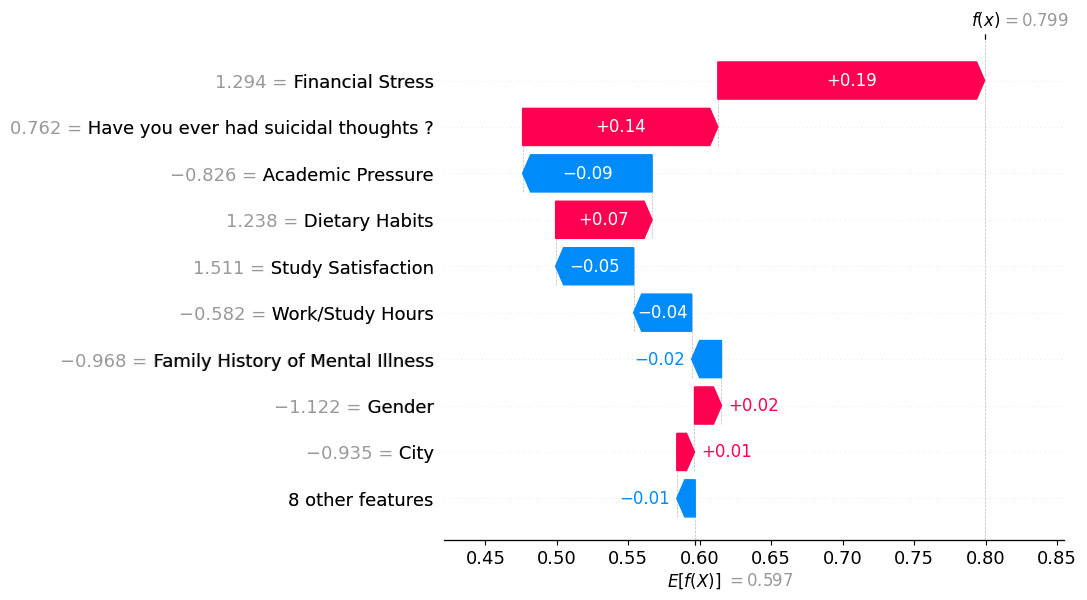

In [12]:
shap.plots.waterfall(shap_values[0])

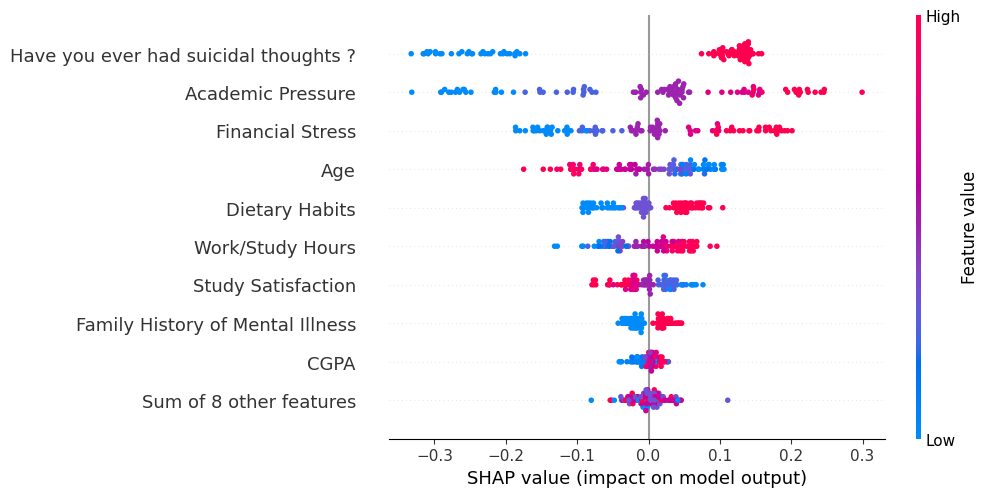

In [13]:
shap.plots.beeswarm(shap_values)

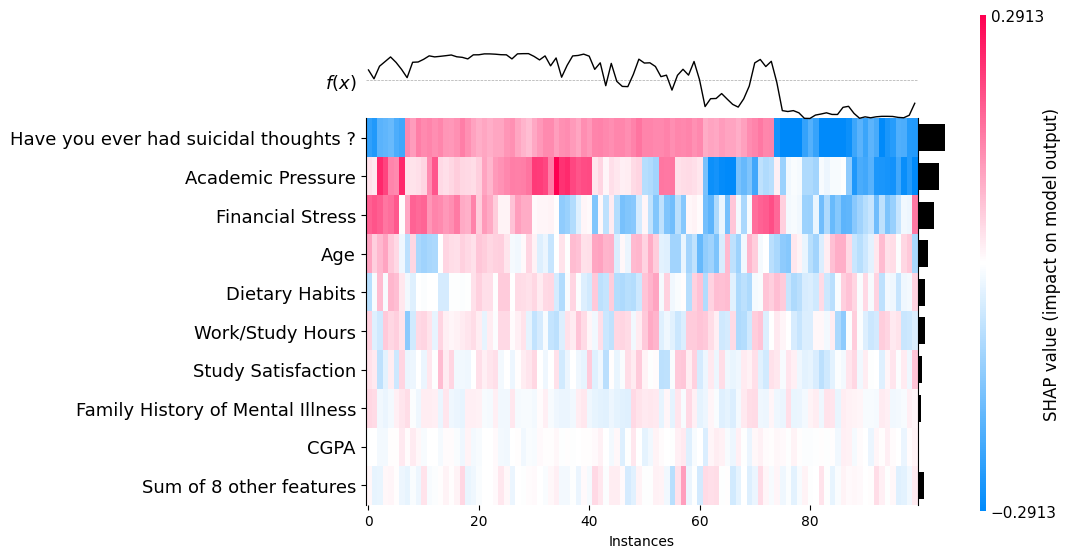

<Axes: xlabel='Instances'>

In [14]:
shap.plots.heatmap(shap_values)